In [4]:
import shapely
import shapely.geos
import geopandas as gpd
import pandas as pd
import numpy
import geopandas as gpd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [2]:
astoria = pd.read_csv('astoria.csv')
astoria.geom = astoria.geom.apply(lambda g: shapely.wkb.loads(g, hex=True))
astoria = gpd.GeoDataFrame(astoria)
astoria.geometry = astoria.geom

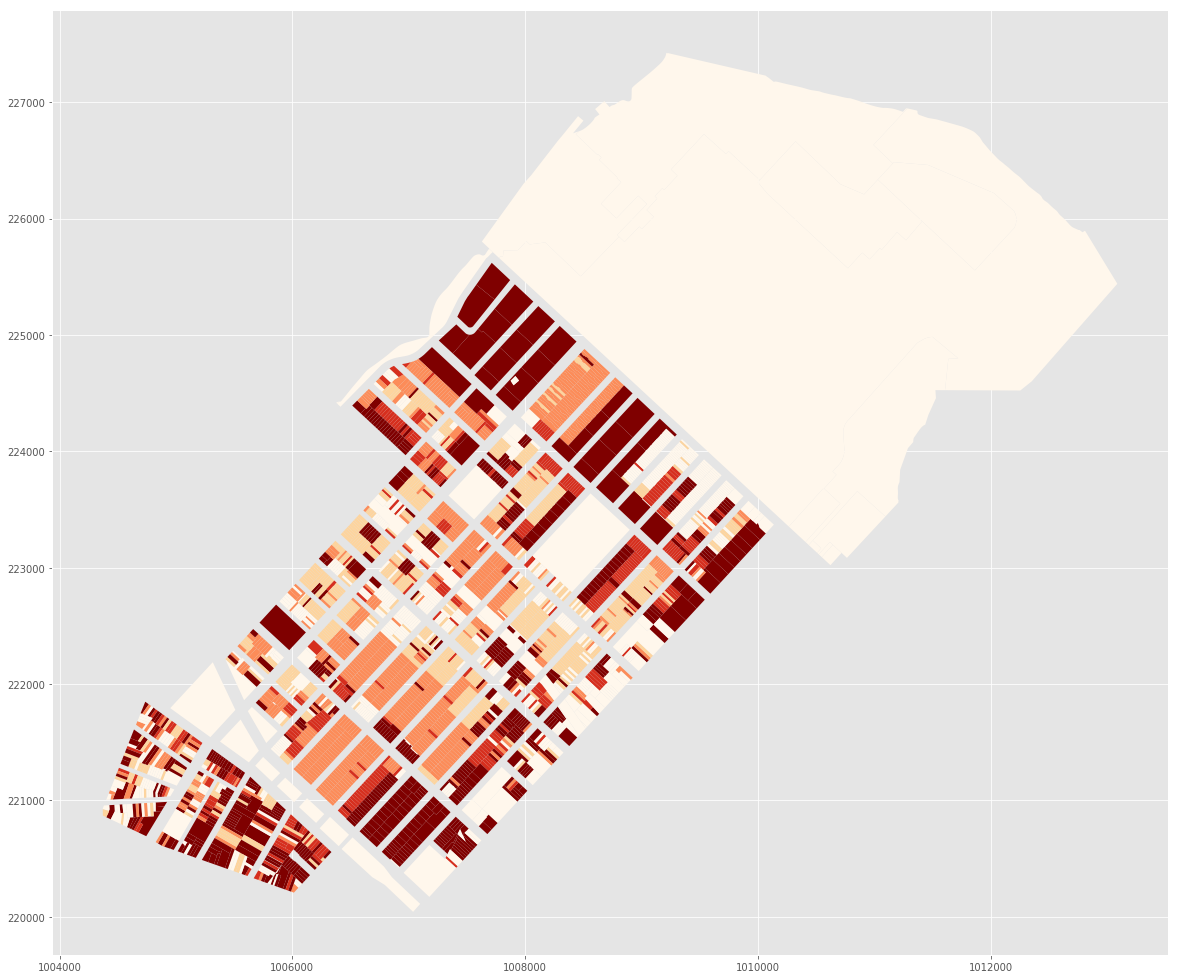

In [32]:
astoria.plot(figsize=(20,20), column= 'resarea', cmap='OrRd',scheme='quantiles')

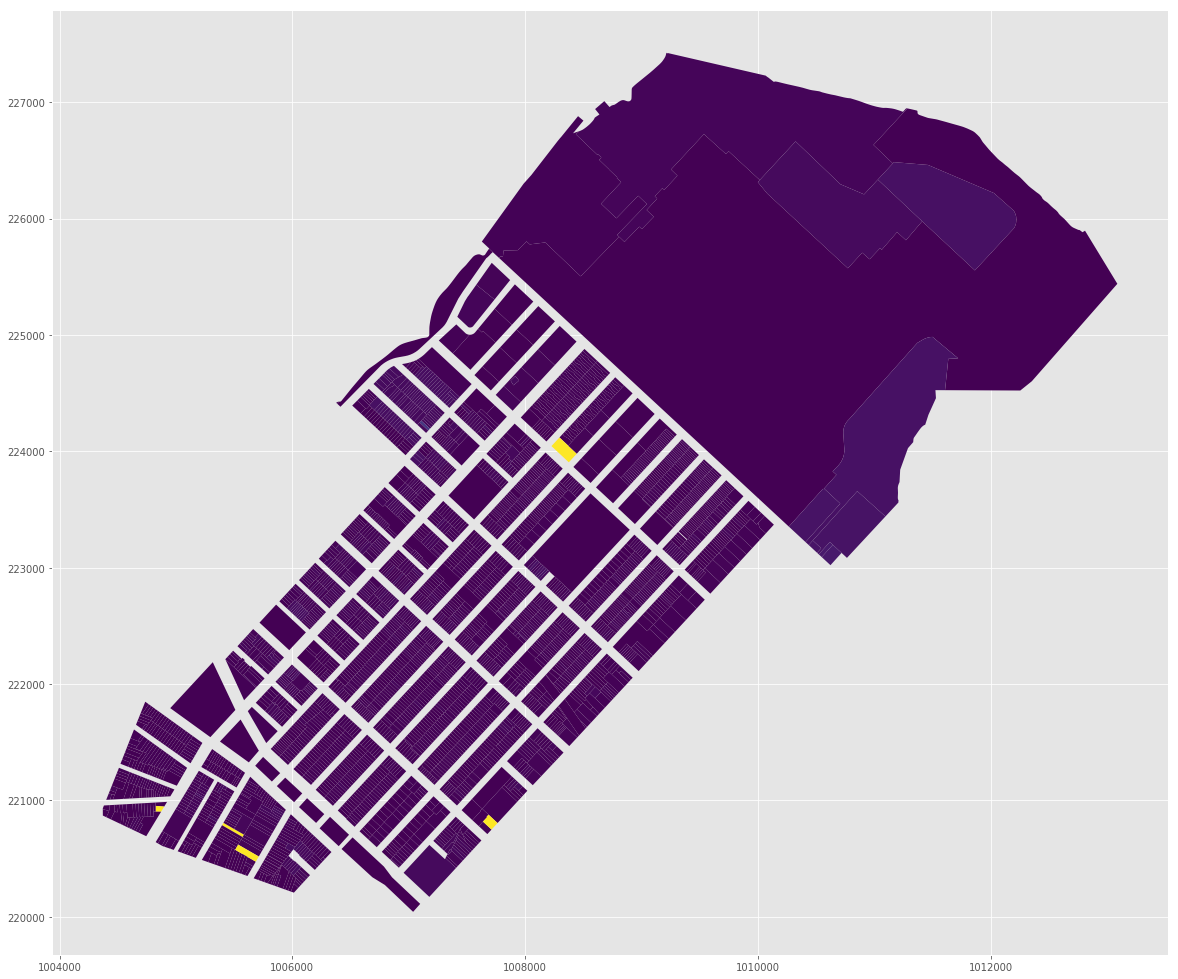

In [71]:

astoria['lot_suffix'] = astoria['lot'] % 200
astoria.plot(figsize=(20,20), column= 'lot')

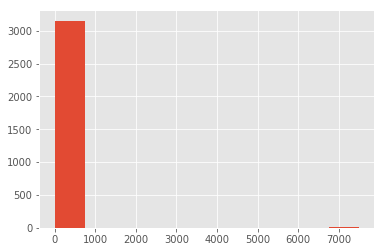

In [67]:
astoria['lot']

In [23]:
astoria.columns

Index([u'id', u'geom', u'borough', u'block', u'lot', u'cd', u'ct2010',
       u'cb2010', u'schooldist', u'council', u'zipcode', u'firecomp',
       u'policeprct', u'healthcent', u'healtharea', u'sanitboro',
       u'sanitdistr', u'sanitsub', u'address', u'zonedist1', u'zonedist2',
       u'zonedist3', u'zonedist4', u'overlay1', u'overlay2', u'spdist1',
       u'spdist2', u'spdist3', u'ltdheight', u'splitzone', u'bldgclass',
       u'landuse', u'easements', u'ownertype', u'ownername', u'lotarea',
       u'bldgarea', u'comarea', u'resarea', u'officearea', u'retailarea',
       u'garagearea', u'strgearea', u'factryarea', u'otherarea', u'areasource',
       u'numbldgs', u'numfloors', u'unitsres', u'unitstotal', u'lotfront',
       u'lotdepth', u'bldgfront', u'bldgdepth', u'ext', u'proxcode',
       u'irrlotcode', u'lottype', u'bsmtcode', u'assessland', u'assesstot',
       u'exemptland', u'exempttot', u'yearbuilt', u'yearalter1', u'yearalter2',
       u'histdist', u'landmark', u'builtfar',

In [39]:
import os

[x for x in os.listdir('.') if x.endswith('.csv')]

['bx_foreign.csv',
 'theaters.csv',
 'astoria.csv',
 'Shows.csv',
 'theaterDescriptions.csv',
 'properties_top_50_sales.csv',
 'top_50_mtges.csv',
 'properties_top_50_mtges.csv',
 'top_50_sales.csv',
 'mn_foreign.csv',
 'document_codes.csv',
 'grosses.csv',
 'parties_top_50_mtges.csv',
 'qn_transit.csv',
 'parties_top_50_sales.csv']

In [42]:
theaters = pd.read_csv('theaters.csv')
theaters.geom = theaters.geom.apply(lambda g: shapely.wkb.loads(g, hex=True))
theaters = gpd.GeoDataFrame(theaters)
theaters.geometry = theaters.geom

In [53]:
theaters.groupby('zipcode').count()['id'].sort_values()

zipcode
10018     1
10022     1
10065     1
10010     1
10105     1
10012     2
10024     2
10025     2
10027     2
10031     2
10009     2
10011     4
10002     4
10014     5
10016     5
10001     5
10023     6
10003    17
10019    21
10036    37
Name: id, dtype: int64

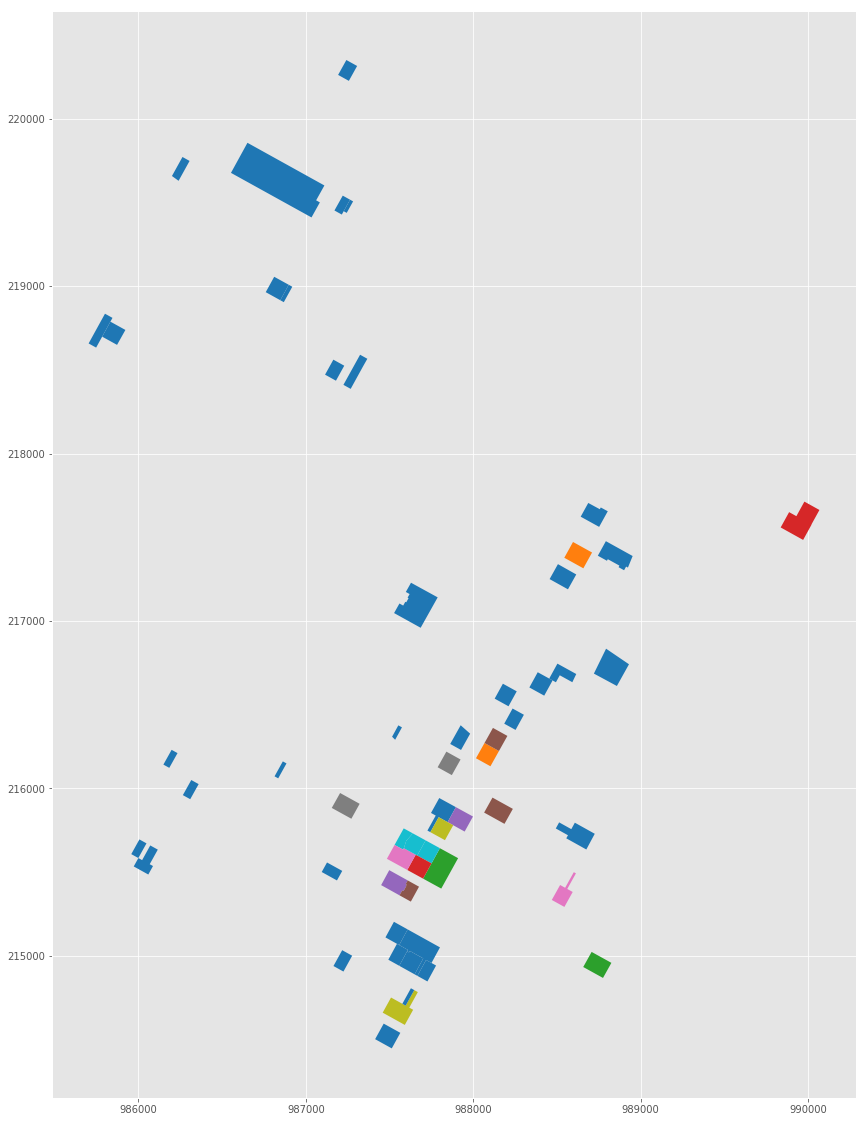

In [57]:
theaters[theaters.zipcode.isin([10036, 10019])].plot(figsize=(20,20), column='landmark')

In [58]:
theaters.landmark

0                                      NaN
1                                      NaN
2                                      NaN
3                                      NaN
4                                      NaN
5                                      NaN
6                                      NaN
7                                      NaN
8                                      NaN
9                                      NaN
10                                     NaN
11                           BOOTH THEATER
12                                     NaN
13                                     NaN
14                                     NaN
15                                     NaN
16                                     NaN
17                                     NaN
18                                     NaN
19                                     NaN
20                                     NaN
21                                     NaN
22                                     NaN
23         